In [1]:
# Loading Visualization

output the estimation



//output the estimation
		out_file_ << ukf.x_(0) << "\t";	//pos1 - est
		out_file_ << ukf.x_(1) << "\t";	//pos2 - est
		out_file_ << ukf.x_(2) << "\t";	//vel_abs -est
		out_file_ << ukf.x_(3) << "\t";	//yaw_angle -est
		out_file_ << ukf.x_(4) << "\t";	//yaw_rate -est

		//output the measurements
		if (measurement_pack_list[k].sensor_type_
				== MeasurementPackage::LASER) {
			//output the estimation
			out_file_ << measurement_pack_list[k].raw_measurements_(0) << "\t";	//p1 - meas
			out_file_ << measurement_pack_list[k].raw_measurements_(1) << "\t"; //p2 - meas
		} else if (measurement_pack_list[k].sensor_type_
				== MeasurementPackage::RADAR) {
			//output the estimation in the cartesian coordinates
			float ro = measurement_pack_list[k].raw_measurements_(0);
			float phi = measurement_pack_list[k].raw_measurements_(1);
			out_file_ << ro * cos(phi) << "\t";	//p1_meas
			out_file_ << ro * sin(phi) << "\t";	//p2_meas
		}

		//output the gt packages
		out_file_ << gt_pack_list[k].gt_values_(0) << "\t"; //p1 - GT
		out_file_ << gt_pack_list[k].gt_values_(1) << "\t";	//p2 - GT
		out_file_ << gt_pack_list[k].gt_values_(2) << "\t";	//v_abs - GT
		out_file_ << gt_pack_list[k].gt_values_(3) << "\t";	//yaw - GT
		out_file_ << gt_pack_list[k].gt_values_(4) << "\t";	//yaw_dot - GT
		out_file_ << gt_pack_list[k].gt_values_(5) << "\t";	//v1 - GT
		out_file_ << gt_pack_list[k].gt_values_(6) << "\n";	//v2 - GT

In [2]:
import plotly.offline as py
from plotly.graph_objs import *
import pandas as pd
import math
import matplotlib.pyplot as plt

py.init_notebook_mode()

#we aim to visualize the following params: 
#'p1', 'p1est','p1meas', 'p2', 'p2est','p2meas', 'v', 'vest', 'yaw', 'yawest', 'yawrate', 'yawrateest', 'acc', 'yawacc'

#input file fields as they are saved into the UKF output file
#my_cols=['p1est','p2est','vest','yawest','yawrateest','p1meas','p2meas','p1','p2','v1_gt','v2_gt', 'NIS']
#with open('./data/output-laser-radar-measurement-data-1.txt') as f:
#    table_ekf_output = pd.read_table(f, sep='\t', header=None, names=my_cols, lineterminator='\n')

with open('./data/output-laser-radar-measurement-data-1.txt') as f:
    df1 = pd.read_table(f, sep='\t', lineterminator='\n')

with open('./data/output-laser-radar-measurement-data-2.txt') as f:
    df2 = pd.read_table(f, sep='\t', lineterminator='\n')

with open('./data/output-laser-measurement-data-1.txt') as f:
    df_l1 = pd.read_table(f, sep='\t', lineterminator='\n')

with open('./data/output-radar-measurement-data-1.txt') as f:
    df_r1 = pd.read_table(f, sep='\t', lineterminator='\n')

with open('./data/output-laser-measurement-data-2.txt') as f:
    df_l2 = pd.read_table(f, sep='\t', lineterminator='\n')

with open('./data/output-radar-measurement-data-2.txt') as f:
    df_r2 = pd.read_table(f, sep='\t', lineterminator='\n')
        

# Cool

In [3]:
#check the parsed file
df1[0:5]

px        py         v     yaw_angle      yaw_rate  px_measured  \
0  8.46292  0.243462  0.000000  0.000000e+00  0.000000e+00      8.46292   
1  8.44850  0.251375 -0.000727  1.290200e-17  2.775560e-17      8.44818   
2  8.47146  0.248799 -0.005593  3.160980e-06  3.260690e-07      8.56759   
3  8.46434  0.250982 -0.008647 -2.088210e-05 -2.977470e-06      8.45582   
4  8.37812  0.251330 -1.104300  1.123340e-03  2.800520e-04      8.42544   

   py_measured  px_true  py_true  vx_true  vy_true        NIS  
0     0.243462     8.60     0.25 -3.00029      0.0   0.000000  
1     0.251553     8.45     0.25 -3.00027      0.0   0.000000  
2     0.241943     8.45     0.25  0.00000      0.0   0.125962  
3     0.253997     8.45     0.25  0.00000      0.0   0.000000  
4     0.254042     8.35     0.25 -1.81979      0.0  15.576800

# Visualize and compare the estimated/measurement/groun truth poses in 2D

In [4]:
import plotly.offline as py
from plotly.graph_objs import *




#Ground Truth
trace1 = Scatter(
    x=df1['px_true'],
    y=df1['py_true'],
    xaxis='x2',
    yaxis='y2',
    name = 'ground truth position',
    mode = 'markers'      
)


#estimations
trace2 = Scatter(
    x=df1['px'],
    y=df1['py'],
    xaxis='x2',
    yaxis='y2',
    name='UKF position estimation',
    mode = 'markers'       
)

#Measurements
trace3 = Scatter(
    x=df1['px_measured'],
    y=df1['py_measured'],
    xaxis='x2',
    yaxis='y2',
    name = 'position measurements',
    #mode = 'markers'
)


data = [trace1, trace2, trace3]

layout = Layout(
    xaxis2=dict(
   
        anchor='x2',
        title='px in m (Dataset 1)'
    ),
    yaxis2=dict(
    
        anchor='y2',
        title='py in m'
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, filename= 'UKF')

In [5]:
#Ground Truth
trace1 = Scatter(
    x=df2['px_true'],
    y=df2['py_true'],
    xaxis='x2',
    yaxis='y2',
    name = 'ground truth position',
    mode = 'markers'      
)


#estimations
trace2 = Scatter(
    x=df2['px'],
    y=df2['py'],
    xaxis='x2',
    yaxis='y2',
    name='UKF position estimation',
    mode = 'markers'       
)

#Measurements
trace3 = Scatter(
    x=df2['px_measured'],
    y=df2['py_measured'],
    xaxis='x2',
    yaxis='y2',
    name = 'position measurements',
    #mode = 'markers'
)


data = [trace1, trace2, trace3]

layout = Layout(
    xaxis2=dict(
   
        anchor='x2',
        title='px in m (Dataset 2)'
    ),
    yaxis2=dict(
    
        anchor='y2',
        title='py in m'
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, filename= 'UKF')

In [6]:
def VisualizeDataset(df1, df2, title1, title2, filename):
    fig = plt.figure(figsize=(14, 6))
    fig.suptitle('Unscented Kalman Filter', fontsize=20, fontweight='bold')

    ax = fig.add_subplot(121)
    fig.subplots_adjust(top=0.85)
    ax.set_title(title1, fontsize=18, fontweight='bold')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.scatter(df1["px_true"],df1["py_true"],alpha=0.2, label = "ground truth")
    ax.scatter(df1["px"],df1["py"],alpha=0.3,marker='x',c='r', label = "UKF")
    ax.legend(loc='upper left')

    ax = fig.add_subplot(122)
    fig.subplots_adjust(top=0.85)
    ax.set_title(title2, fontsize=18, fontweight='bold')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.scatter(df2["px_true"],df2["py_true"],alpha=0.2, label = "ground truth")
    ax.scatter(df2["px"],df2["py"],alpha=0.3,marker='x',c='r', label = "UKF")
    ax.legend(loc='upper left')

    plt.savefig('./images/' + filename)
    plt.show()

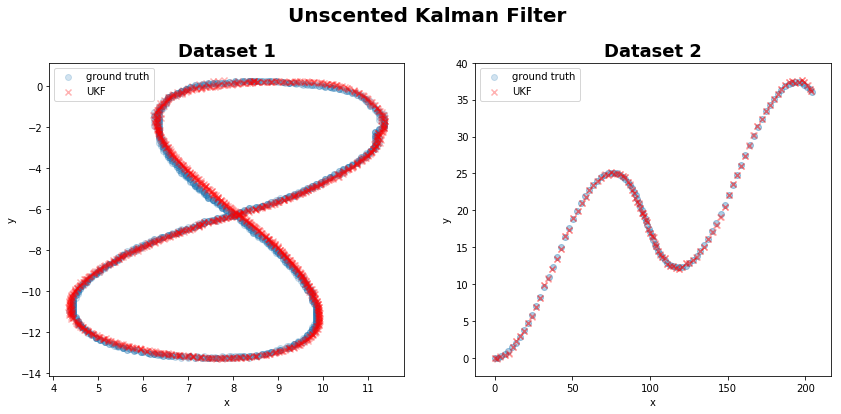

In [7]:
VisualizeDataset(df1, df2, 'Dataset 1', 'Dataset 2', 'position.png')

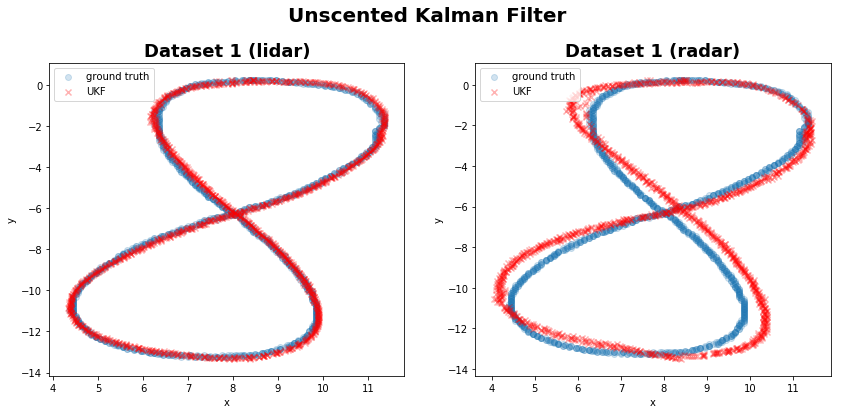

In [8]:
VisualizeDataset(df_l1, df_r1, 'Dataset 1 (lidar)', 'Dataset 1 (radar)', 'position-dataset1-lidar-radar.png')

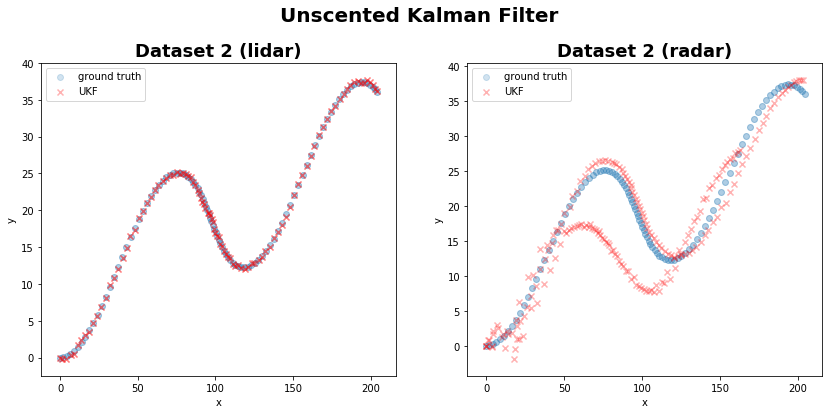

In [9]:
VisualizeDataset(df_l2, df_r2, 'Dataset 2 (lidar)', 'Dataset 2 (radar)', 'position-dataset2-lidar-radar.png')

In [10]:
def NIS_lidar_radar(dfl, dfr, label, filename):
    fig = plt.figure(figsize=(14, 3))
    fig.suptitle('NIS', fontsize=20, fontweight='bold')

    ax = fig.add_subplot(121)
    fig.subplots_adjust(top=0.85)
    ax.set_title(label+' (lidar)', fontsize=18, fontweight='bold')
    ax.set_xlabel('time')
    ax.set_ylabel('chi2')
    ax.plot(dfl['NIS'])
    ax.plot((0, dfl.shape[0]), (5.991, 5.991), 'k-', linewidth=3, label = '5.991')
    ax.legend(loc='upper left')
    ax.axis([0, dfl.shape[0] , 0, 35])

    ax = fig.add_subplot(122)
    fig.subplots_adjust(top=0.85)
    ax.set_title(label+' (radar)', fontsize=18, fontweight='bold')
    ax.set_xlabel('time')
    ax.set_ylabel('chi2')
    ax.plot(dfr['NIS'])
    ax.plot((0, dfr.shape[0]), (7.8, 7.8), 'k-', linewidth=3, label = '7.8')
    ax.legend(loc='upper left')
    ax.axis([0, dfr.shape[0] , 0, 35])
    plt.savefig('images/' + filename)
    plt.show()    

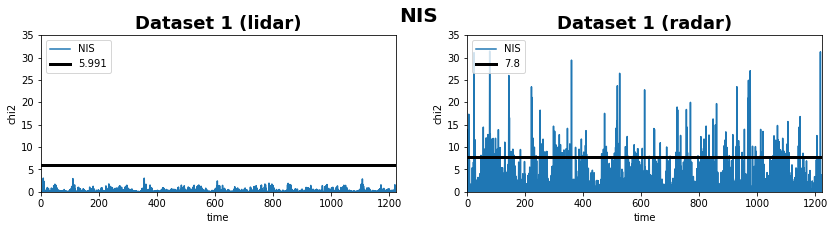

In [11]:
NIS_lidar_radar(df_l1, df_r1, 'Dataset 1', 'NIS-dataset1.png')

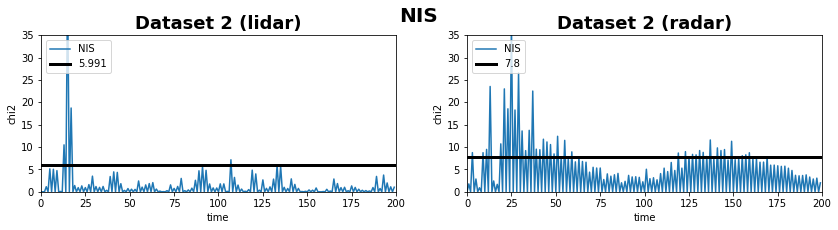

In [12]:
NIS_lidar_radar(df_l2, df_r2, 'Dataset 2', 'NIS-dataset2.png')

In [13]:
def NIS(df1, df2, filename):
    fig = plt.figure(figsize=(14, 3))
    fig.suptitle('NIS', fontsize=20, fontweight='bold')

    ax = fig.add_subplot(121)
    fig.subplots_adjust(top=0.85)
    ax.set_title('Dataset 1', fontsize=18, fontweight='bold')
    ax.set_xlabel('time')
    ax.set_ylabel('chi2')
    ax.plot(df1['NIS'])
    ax.plot((0, df1.shape[0]), (7.8, 7.8), 'k-', linewidth=3, label = '7.8')
    ax.legend(loc='upper left')
    ax.axis([0, df1.shape[0] , 0, 35])

    ax = fig.add_subplot(122)
    fig.subplots_adjust(top=0.85)
    ax.set_title('Dataset 2', fontsize=18, fontweight='bold')
    ax.set_xlabel('time')
    ax.set_ylabel('chi2')
    ax.plot(df2['NIS'])
    ax.plot((0, df2.shape[0]), (7.8, 7.8), 'k-', linewidth=3, label = '7.8')
    ax.legend(loc='upper left')
    ax.axis([0, df2.shape[0] , 0, 35])
    plt.savefig('images/' + filename)
    plt.show()    

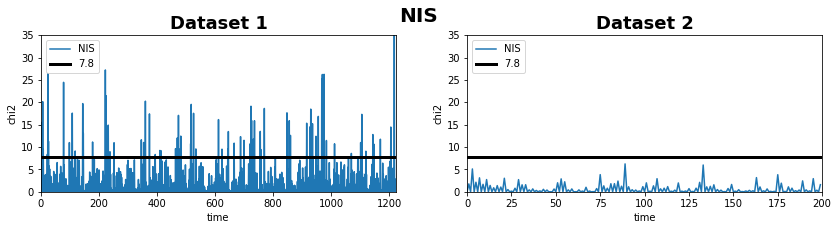

In [14]:
NIS(df1, df2, 'NIS.png')

In [15]:
len(df1[df1['NIS']>7.8])/len(df1['NIS'])

0.059640522875817

In [16]:
len(df2[df2['NIS']>7.8])/len(df2['NIS'])

0.0